<a href="https://colab.research.google.com/github/thefr33radical/codeblue/blob/master/deeplearning/LSTM_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Time Series Forecasting using LSTM

In [76]:
import pandas as pd
import numpy as np
from pandas import datetime

def parse_data(d):
  return datetime.strptime("210"+d,"%Y-%m")

data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv",parse_dates=[0],date_parser=parse_data,index_col=0,header=0,squeeze=True)
print(data.head())

Month
2101-01-01    266.0
2101-02-01    145.9
2101-03-01    183.1
2101-04-01    119.3
2101-05-01    180.3
Name: Sales, dtype: float64


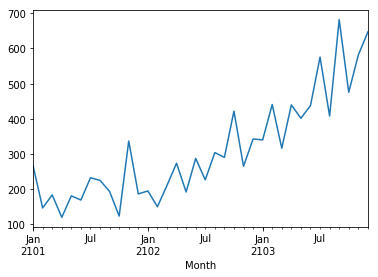

In [77]:
data.plot()
data = data.values

[266.  145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9
 194.3 149.5 210.1 273.3 191.4 287.  226.  303.6 289.9 421.6 264.5 342.3] [339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3 646.9]
12
[342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6, 682.0, 475.3, 581.3]
136.76131884905664


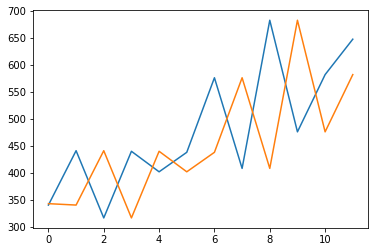

In [75]:
# Baseline Model Persistance Forecast Model - (T-1) is used to predict T
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from math import sqrt

train = data[:-12]
test = data[-12:]

print(train,test)
hist=[i for i in train]
pred=list()
for i in range(len(test)):
  #print(hist[-1])
  pred.append(hist[-1])
  hist.append(test[i])

print(len(test))
print((pred))

print(sqrt(mean_squared_error(test,pred)))

plt.plot(test)
plt.plot(pred)
plt.show()

In [0]:
"""
Transform the time series into a supervised learning problem
Transform the time series data so that it is stationary.
Transform the observations to have a specific scale.

"""

# Transform Time Series to Supervise3d Learning Problem

def timeseries_supervised(data,lag=1):
  """
  Transform Time Series Data to Supervised
  """
  d = pd.DataFrame(data)
  columns=[]
  for i in range(1,lag+1):
    columns.append(d.shift(i))
  #columns.append(d)
  #print(columns)
  #d["Y"]=columns
  d= pd.concat([columns[0],d],axis=1)
  d.fillna(0,inplace=True)
  print(d)
  return d
    
x =timeseries_supervised(data)
y= data

In [0]:

# make the Data Stationary
def MakeStationary(data,interval):
  #print(data)
  diff_data=[]
  
  for i in range(interval):
    diff_data.append(0)
  for i in range(interval,len(data)):
    val=data[i]-data[i-interval]
    diff_data.append(val)
  print("diff",diff_data)
  return diff_data
print(data)
diff= MakeStationary(data,2)
        
def InvertStationary(data,diff,interval):
  norm_data=[]
  for i in range(interval):
    norm_data.append(0)
  for i in range(interval,len(data)):
    val = diff[i]+data[i-interval]
    norm_data.append(val)
  print(norm_data)
  
InvertStationary(data,diff,2)